# Building Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


### Searching for null values

In [5]:
df_train.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

### Searching for duplicates 

In [6]:
df_train.duplicated().sum()

2323

In [7]:
df_clean = df_train.drop_duplicates()

### Rename Columns

In [8]:
df_clean.rename(columns = lambda x: x.strip().lower(),inplace=True)

C:\Users\Osama Ismael\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
df_clean.head(0)

,dates,category,descript,dayofweek,pddistrict,resolution,address,x,y


## Inspecting Data Types

In [10]:
df_clean.dtypes

dates          object
category       object
descript       object
dayofweek      object
pddistrict     object
resolution     object
address        object
x             float64
y             float64
dtype: object

In [11]:
#change dates from object to datetime
df_clean["dates"] = pd.to_datetime(df_clean["dates"])

<ipython-input-11-e977e337a9e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["dates"] = pd.to_datetime(df_clean["dates"])


In [12]:
#get year, month, day and hour from dates
df_clean["year"] = df_clean["dates"].dt.year
df_clean["month"] = df_clean["dates"].dt.month
df_clean["day"] = df_clean["dates"].dt.day
df_clean["hour"] = df_clean["dates"].dt.hour

<ipython-input-12-2b1f2ad6b8b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["year"] = df_clean["dates"].dt.year
<ipython-input-12-2b1f2ad6b8b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["month"] = df_clean["dates"].dt.month
<ipython-input-12-2b1f2ad6b8b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [13]:
#changing them from nomircal to categorical
df_clean["year"] = df_clean["year"].astype(str)
df_clean["month"] = df_clean["month"].astype(str)
df_clean["day"] = df_clean["day"].astype(str)
df_clean["hour"] = df_clean["hour"].astype(str)

<ipython-input-13-4c06b7959ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["year"] = df_clean["year"].astype(str)
<ipython-input-13-4c06b7959ae3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["month"] = df_clean["month"].astype(str)
<ipython-input-13-4c06b7959ae3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [14]:
df_clean.dtypes

dates         datetime64[ns]
category              object
descript              object
dayofweek             object
pddistrict            object
resolution            object
address               object
x                    float64
y                    float64
year                  object
month                 object
day                   object
hour                  object
dtype: object

# Explore Data

In [15]:
x = df_clean.category.unique()
y = list(df_clean.category.value_counts())

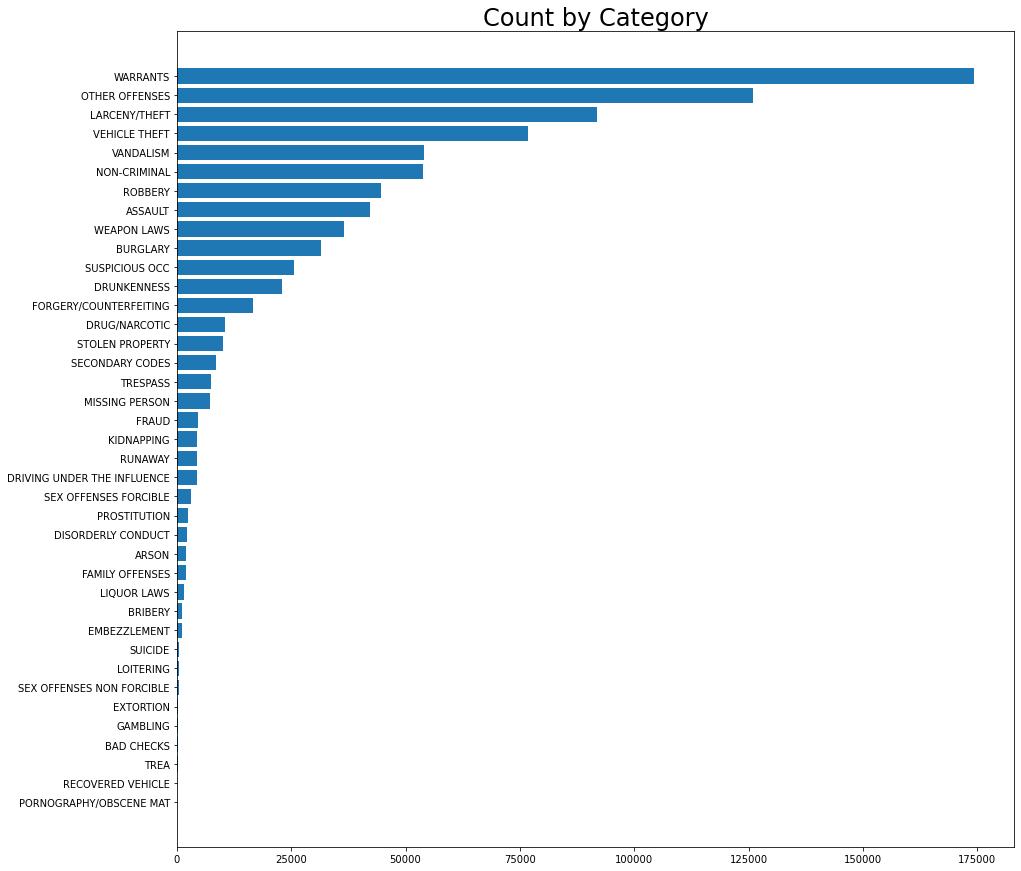

In [16]:
plt.figure(figsize=(15, 15))
plt.barh(x,y)
plt.gca().invert_yaxis()
plt.title('Count by Category', fontdict={'fontsize': 24});

In [17]:
counts = df_clean.dayofweek.value_counts()
days = df_clean.dayofweek.unique()

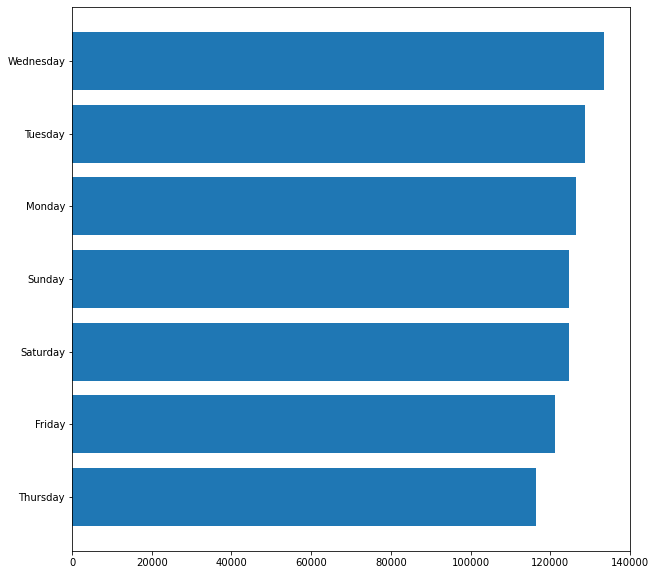

In [18]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.barh(days,counts);

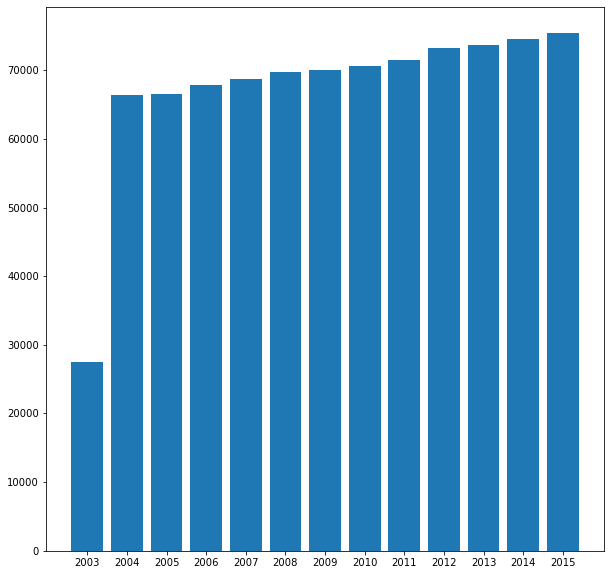

In [19]:
counts = df_clean.year.value_counts()
years = df_clean.year.unique()
plt.figure(figsize=(10, 10))
plt.bar(years,counts)
plt.gca().invert_xaxis();

''

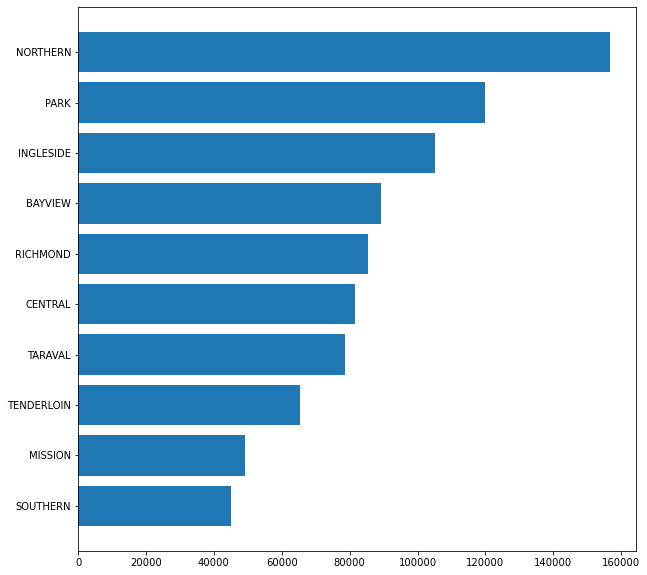

In [20]:
counts = df_clean.pddistrict.value_counts()
pddistrict = df_clean.pddistrict.unique()
plt.figure(figsize=(10, 10))
plt.barh(pddistrict,counts)
plt.gca().invert_yaxis()
;

# Feature Engineering

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   dates       875726 non-null  datetime64[ns]
 1   category    875726 non-null  object        
 2   descript    875726 non-null  object        
 3   dayofweek   875726 non-null  object        
 4   pddistrict  875726 non-null  object        
 5   resolution  875726 non-null  object        
 6   address     875726 non-null  object        
 7   x           875726 non-null  float64       
 8   y           875726 non-null  float64       
 9   year        875726 non-null  object        
 10  month       875726 non-null  object        
 11  day         875726 non-null  object        
 12  hour        875726 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 93.5+ MB


In [22]:
train_data_x = df_clean.drop(columns = ["dates","descript","resolution","x","y","address","category"])
train_data_y = df_clean["category"]

In [23]:
train_data_x.head(0)

,dayofweek,pddistrict,year,month,day,hour


# Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le_1= LabelEncoder()
train_data["category"] = le_1.fit_transform(train_data["category"])

NameError: name 'train_data' is not defined

In [ ]:
le= LabelEncoder() 
column = ["dayofweek","pddistrict","address"]
for i in column:
    train_data[i] = le.fit_transform(train_data[i])

In [ ]:
x , y = train_data.drop(columns = "category"),train_data["category"]

In [ ]:
#split data to training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import accuracy_score

clf_accuracy = accuracy_score(y_pred,y_test)
print(clf_accuracy*100)

# Test Data

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test.info()

In [ ]:
df_test.isna().sum()

In [ ]:
df_test.duplicated().sum()

In [ ]:
df_test.rename(columns = lambda x: x.strip().lower(),inplace=True)

In [ ]:
df_test.dtypes

In [ ]:
#change dates from object to datetime
df_test["dates"] = pd.to_datetime(df_test["dates"])

In [ ]:
#get year, month, day and hour from dates
df_test["year"] = df_test["dates"].dt.year
df_test["month"] = df_test["dates"].dt.month
df_test["day"] = df_test["dates"].dt.day
df_test["hour"] = df_test["dates"].dt.hour

In [ ]:
#changing them from nomircal to categorical
df_test["year"] = df_test["year"].astype(str)
df_test["month"] = df_test["month"].astype(str)
df_test["day"] = df_test["day"].astype(str)
df_test["hour"] = df_test["hour"].astype(str)

In [ ]:
df_test=pd.concat([df_test,pd.get_dummies(df_test['pddistrict'])],axis=1)
df_test.drop('pddistrict',axis=1,inplace=True)

df_test=pd.concat([df_test,pd.get_dummies(df_test['dayofweek'])],axis=1)
df_test.drop('dayofweek',axis=1,inplace=True)

df_test=pd.concat([df_test,pd.get_dummies(df_test['year'])],axis=1)
df_test.drop('year',axis=1,inplace=True)

df_test=pd.concat([df_test,pd.get_dummies(df_test['month'])],axis=1)
df_test.drop('month',axis=1,inplace=True)

df_test=pd.concat([df_test,pd.get_dummies(df_test['day'])],axis=1)
df_test.drop('day',axis=1,inplace=True)

df_test=pd.concat([df_test,pd.get_dummies(df_test['hour'])],axis=1)
df_test.drop('hour',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder() 
column = ["dayofweek","pddistrict","address"]
for i in column:
    df_test[i] = le.fit_transform(df_test[i])

In [ ]:
df_test.head()

In [ ]:
df_test.drop(columns = ["dates","id","x","y","address"],inplace=True)

In [ ]:
df_test.head(0)

In [ ]:
df_test["category"] = classifier.predict(df_test)

In [ ]:
df_test["category"] = x

In [ ]:
df_test["category"] = le_1.inverse_transform(df_test["category"])

In [ ]:
df_test["category"].value_counts()

In [ ]:
df_test.head()